Parse the tweets

In [71]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
from sklearn import decomposition
import statsmodels.regression.linear_model as lm
from sklearn.ensemble import RandomForestRegressor 
from typing import List, Tuple, Dict

import plotly.express as px
import datetime

# %run ./../mobilityHelpers.ipynb

MYDIR = "./../../../ResearchProposal/"

myFiles = os.listdir(MYDIR)
twtDir = MYDIR + "meltwater/final_query"

# gdpFile = MYDIR + "bea_gov/gdp/gdp_ready_to_analyze.csv"
# piFile = MYDIR + "bea_gov/personal_income/personal_income_ready_to_analyze.csv"
# hhiFile = MYDIR + "income_inequality/census_income_by_county/hh_income__census_data.csv"
# populationFile = MYDIR + "population_dynamics/census_population_data_2010_2019.csv"
# suicideFile = MYDIR + "suicide/multiple_causes_of_death__suicide.csv"
# employmentFile = MYDIR + "unemployment/employment_by_county_state_year.csv"
# stateAbbrevFile = MYDIR + "state_abbreviations.csv"
# myfiles = {"gdp": gdpFile,
#            "pi": piFile,
#            "hhi": hhiFile,
#            "pop": populationFile,
#            "sc": suicideFile,
#            "emp": employmentFile,
#           }

tweetFiles = os.listdir(twtDir)
sorted(tweetFiles)

['bay_area_AND_politics_OR_coronavirus__OR_covid_OR__2020-11-06-19-16-14.csv',
 'bay_area_AND_politics_OR_coronavirus__OR_covid_OR__2020-11-06-19-20-48.csv',
 'bay_area_AND_politics_OR_coronavirus__OR_covid_OR__2020-11-06-19-21-27.csv',
 'bay_area_AND_politics_OR_coronavirus__OR_covid_OR__2020-11-06-19-24-24.csv',
 'bay_area_AND_politics_OR_coronavirus__OR_covid_OR__2020-11-06-19-33-07.csv',
 'bay_area_AND_politics_OR_coronavirus__OR_covid_OR__2020-11-06-19-37-02.csv',
 'bay_area_AND_politics_OR_coronavirus__OR_covid_OR__2020-11-06-19-39-25.csv',
 'bay_area_AND_politics_OR_coronavirus__OR_covid_OR__2020-11-06-19-39-56.csv',
 'bay_area_AND_politics_OR_coronavirus__OR_covid_OR__2020-11-06-19-40-30.csv',
 'bay_area_AND_politics_OR_coronavirus__OR_covid_OR__2020-11-06-19-50-29.csv',
 'bay_area_AND_politics_OR_coronavirus__OR_covid_OR__2020-11-08-00-02-39.csv',
 'bay_area_AND_politics_OR_coronavirus__OR_covid_OR__2020-11-08-00-03-17.csv',
 'bay_area_AND_politics_OR_coronavirus__OR_wildfires

In [72]:
tweetsDFht: Dict[str, pd.DataFrame] = {}
for ff in tweetFiles:
    if ff == 'news':
        continue
    print(ff)
    try:
        ffn = twtDir + "/" + ff
        df = pd.read_csv(ffn
                 , encoding='utf-16',
                 sep='\t'
                )
        tweetsDFht[ff] = df
    except:
        e = sys.exc_info()
        print(e)

tweetsDF = pd.concat(tweetsDFht, 
                     ignore_index=True).reset_index(drop=True)
print(f"""Got all tweets into a data frame ({len(tweetsDF)} rows)""")

colnames = list(tweetsDF.columns)

for ii in range(len(colnames)):
    colnames[ii] = colnames[ii].replace(' ', '_').lower()
tweetsDF.columns = colnames
tweetsDF.head()

bay_area_AND_politics_OR_coronavirus__OR_covid_OR__2020-11-06-19-16-14.csv
bay_area_AND_politics_OR_coronavirus__OR_covid_OR__2020-11-06-19-20-48.csv
bay_area_AND_politics_OR_coronavirus__OR_covid_OR__2020-11-06-19-21-27.csv
bay_area_AND_politics_OR_coronavirus__OR_covid_OR__2020-11-06-19-24-24.csv
bay_area_AND_politics_OR_coronavirus__OR_covid_OR__2020-11-06-19-33-07.csv
bay_area_AND_politics_OR_coronavirus__OR_covid_OR__2020-11-06-19-37-02.csv
bay_area_AND_politics_OR_coronavirus__OR_covid_OR__2020-11-06-19-39-25.csv
bay_area_AND_politics_OR_coronavirus__OR_covid_OR__2020-11-06-19-39-56.csv
bay_area_AND_politics_OR_coronavirus__OR_covid_OR__2020-11-06-19-40-30.csv
bay_area_AND_politics_OR_coronavirus__OR_covid_OR__2020-11-06-19-50-29.csv
bay_area_AND_politics_OR_coronavirus__OR_covid_OR__2020-11-08-00-02-39.csv
bay_area_AND_politics_OR_coronavirus__OR_covid_OR__2020-11-08-00-03-17.csv
bay_area_AND_politics_OR_coronavirus__OR_wildfires_2020-11-06-19-00-18.csv
tweets_bay_area_summary.c

,date,headline,url,opening_text,hit_sentence,source,influencer,country,subregion,language,...,twitter_screen_name,twitter_user_profile_url,twitter_bio,twitter_followers,twitter_following,alternate_date_format,time,state,city,document_tags
0,02-Mar-2020 11:57PM,NaN,http://twitter.com/Shelton_Champ/statuses/1234...,NaN,RT @abc7newsbayarea: The novel coronavirus is ...,Twitter,@shelton_champ,United States,NaN,English,...,Sh3lt0n Br3ndan,https://twitter.com/Shelton_Champ,"27. Marina is my girl, my whole world 💕 07/10/...",152.0,713.0,"Mar 2, 2020",11:57 PM,California,Clovis,NaN
1,02-Mar-2020 11:26PM,NaN,https://twitter.com/Paparazzi4U/statuses/12347...,NaN,RT @policeofficer: She was found strangled wit...,Twitter,@paparazzi4u,United States,NaN,English,...,Virtual Paparazzi,https://twitter.com/Paparazzi4U,The Virtual Paparazzi stalks celebrities for you.,13674.0,14156.0,"Mar 2, 2020",11:26 PM,California,Hollywood,NaN
2,02-Mar-2020 11:14PM,NaN,https://twitter.com/Michael46214943/statuses/1...,NaN,RT @policeofficer: She was found strangled wit...,Twitter,@michael46214943,United States,NaN,English,...,Michael,https://twitter.com/Michael46214943,NaN,39.0,404.0,"Mar 2, 2020",11:14 PM,California,Los Angeles,NaN
3,02-Mar-2020 11:12PM,NaN,https://twitter.com/jennyhlam/statuses/1234738...,NaN,"RT @DavidChiu: Tomorrow, California will vote ...",Twitter,@jennyhlam,United States,NaN,English,...,Jenny Lam,https://twitter.com/jennyhlam,"Board of Education Commissioner, San Francisco...",292.0,381.0,"Mar 2, 2020",11:12 PM,California,San Francisco,NaN
4,02-Mar-2020 11:00PM,NaN,https://twitter.com/predatorhunting/statuses/1...,NaN,RT @policeofficer: She was found strangled wit...,Twitter,@predatorhunting,United States,NaN,English,...,Predator Hunter,https://twitter.com/predatorhunting,"News & info on Hunting for Predators; along, w...",24729.0,23307.0,"Mar 2, 2020",11:00 PM,California,Coarsegold,NaN


In [73]:
date_time = tweetsDF.date.str.split(expand=True)
date_time.columns = ['ds', 'ts']
date_time.ds = pd.to_datetime(date_time.ds)
date_time.ts = pd.to_datetime(date_time.ts)
date_time['date'] = tweetsDF.date

date_time['time'] = [datetime.datetime.time(d) for d in date_time.ts]
date_time['datetime'] = date_time['ds'].astype(str) + ' ' + date_time['time'].astype(str)
del date_time['ts']
del date_time['ds']
del date_time['time']

tweetsDF = tweetsDF.merge(date_time, on='date')
del tweetsDF['date']
tweetsDF.head()

,headline,url,opening_text,hit_sentence,source,influencer,country,subregion,language,reach,...,twitter_user_profile_url,twitter_bio,twitter_followers,twitter_following,alternate_date_format,time,state,city,document_tags,datetime
0,NaN,http://twitter.com/Shelton_Champ/statuses/1234...,NaN,RT @abc7newsbayarea: The novel coronavirus is ...,Twitter,@shelton_champ,United States,NaN,English,152,...,https://twitter.com/Shelton_Champ,"27. Marina is my girl, my whole world 💕 07/10/...",152.0,713.0,"Mar 2, 2020",11:57 PM,California,Clovis,NaN,2020-03-02 23:57:00
1,NaN,https://twitter.com/Paparazzi4U/statuses/12347...,NaN,RT @policeofficer: She was found strangled wit...,Twitter,@paparazzi4u,United States,NaN,English,13674,...,https://twitter.com/Paparazzi4U,The Virtual Paparazzi stalks celebrities for you.,13674.0,14156.0,"Mar 2, 2020",11:26 PM,California,Hollywood,NaN,2020-03-02 23:26:00
2,NaN,https://twitter.com/Michael46214943/statuses/1...,NaN,RT @policeofficer: She was found strangled wit...,Twitter,@michael46214943,United States,NaN,English,39,...,https://twitter.com/Michael46214943,NaN,39.0,404.0,"Mar 2, 2020",11:14 PM,California,Los Angeles,NaN,2020-03-02 23:14:00
3,NaN,https://twitter.com/jennyhlam/statuses/1234738...,NaN,"RT @DavidChiu: Tomorrow, California will vote ...",Twitter,@jennyhlam,United States,NaN,English,292,...,https://twitter.com/jennyhlam,"Board of Education Commissioner, San Francisco...",292.0,381.0,"Mar 2, 2020",11:12 PM,California,San Francisco,NaN,2020-03-02 23:12:00
4,NaN,https://twitter.com/predatorhunting/statuses/1...,NaN,RT @policeofficer: She was found strangled wit...,Twitter,@predatorhunting,United States,NaN,English,24729,...,https://twitter.com/predatorhunting,"News & info on Hunting for Predators; along, w...",24729.0,23307.0,"Mar 2, 2020",11:00 PM,California,Coarsegold,NaN,2020-03-02 23:00:00


In [74]:
csvOut = twtDir + "/tweets_bay_area_summary.csv"
tweetsDF.to_csv(csvOut, index=False)
print(f"""Saved the tweets to {csvOut}""")

Saved the tweets to ./../../../ResearchProposal/meltwater/final_query/tweets_bay_area_summary.csv


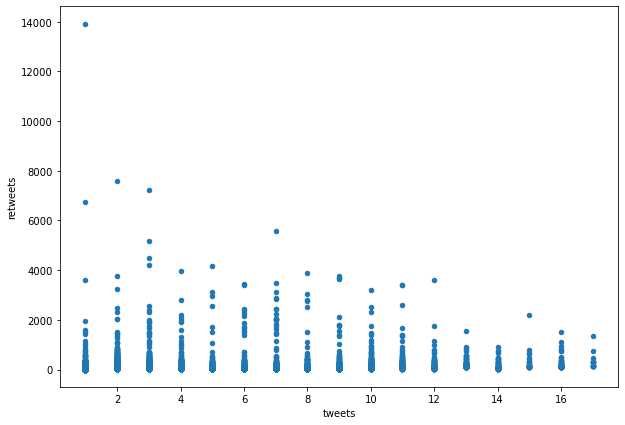

In [75]:
grpBy = tweetsDF.groupby(['datetime', 'hit_sentence'])

tweets = pd.DataFrame(tweetsDF.groupby(['datetime']).nunique()['hit_sentence'])
tweets = tweets.sort_values('hit_sentence', ascending=False, inplace=False).reset_index()
tweets.rename(columns={'hit_sentence': 'tweets'}, inplace=True)

retweets = pd.DataFrame(grpBy.count()['language'])
retweets = retweets.sort_values('language', ascending=False, inplace=False).reset_index()
retweets.rename(columns={'language': 'retweets'}, inplace=True)

reach = pd.DataFrame(grpBy.sum()['reach'])
reach = reach.sort_values('reach', ascending=False, inplace=False).reset_index()

merged = retweets.merge(reach, on=['datetime', 'hit_sentence'])
merged = merged.merge(tweets, on=['datetime'])
ax = merged.plot.scatter(x='tweets', y='retweets', figsize=(10, 7))
plt.show()

In [76]:
merged.describe()

,retweets,reach,tweets
count,107658.000000,1.076580e+05,107658.000000
mean,12.580830,7.435449e+04,1.822178
std,105.469015,3.208326e+06,1.570887
min,1.000000,0.000000e+00,1.000000
25%,1.000000,4.370000e+02,1.000000
50%,2.000000,1.782000e+03,1.000000
75%,4.000000,8.076000e+03,2.000000
max,13924.000000,7.405209e+08,17.000000


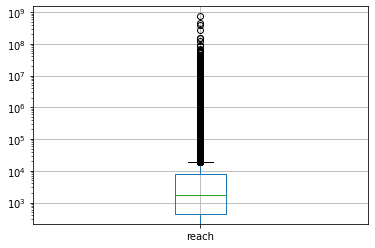

In [77]:
ax = merged.boxplot('reach')
ax.set_yscale('log')
plt.show()

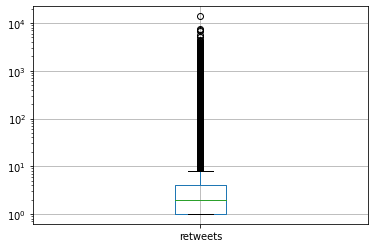

In [78]:
ax = merged.boxplot('retweets')
ax.set_yscale('log')
plt.show()

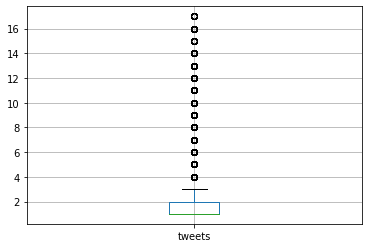

In [79]:
ax = merged.boxplot('tweets')
# ax.set_yscale('log')
plt.show()

In [80]:
tweetsDF.columns

Index(['headline', 'url', 'opening_text', 'hit_sentence', 'source',
       'influencer', 'country', 'subregion', 'language', 'reach',
       'desktop_reach', 'mobile_reach', 'twitter_social_echo',
       'facebook_social_echo', 'reddit_social_echo', 'national_viewership',
       'engagement', 'ave', 'sentiment', 'key_phrases', 'input_name',
       'keywords', 'twitter_authority', 'tweet_id', 'twitter_id',
       'twitter_client', 'twitter_screen_name', 'twitter_user_profile_url',
       'twitter_bio', 'twitter_followers', 'twitter_following',
       'alternate_date_format', 'time', 'state', 'city', 'document_tags',
       'datetime'],
      dtype='object')

C:\Users\alexg\AppData\Roaming\Python\Python36\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning:

FixedFormatter should only be used together with FixedLocator



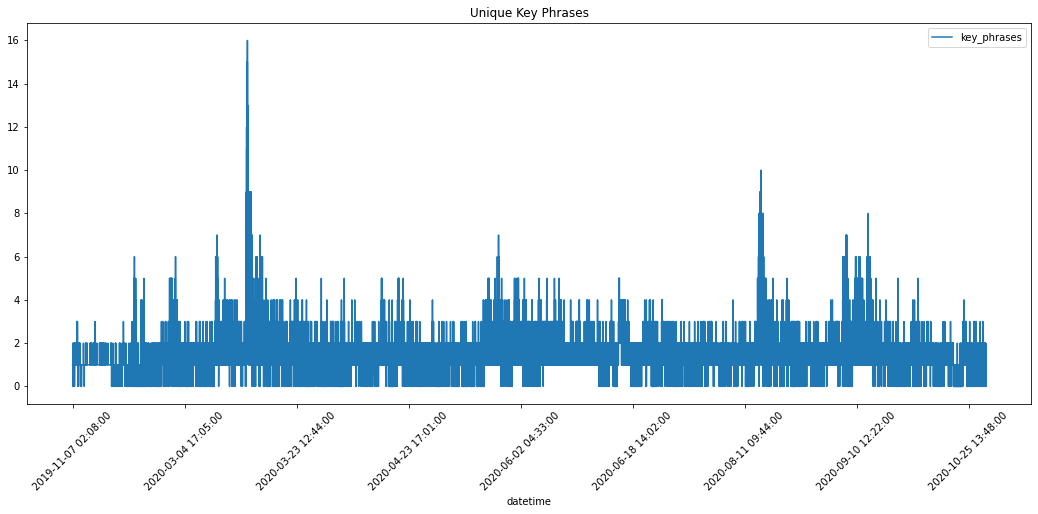

In [81]:
"""By Key Phrase"""
props = {"rotation": 45}

key_phrases_timeline = pd.DataFrame(tweetsDF.groupby(['datetime']).nunique()['key_phrases']).reset_index()
ax = key_phrases_timeline.plot.line(x='datetime', figsize=(18, 7))
ax.set_title('Unique Key Phrases')
plt.setp(ax.get_xticklabels(), **props)
plt.show()

C:\Users\alexg\AppData\Roaming\Python\Python36\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning:

FixedFormatter should only be used together with FixedLocator



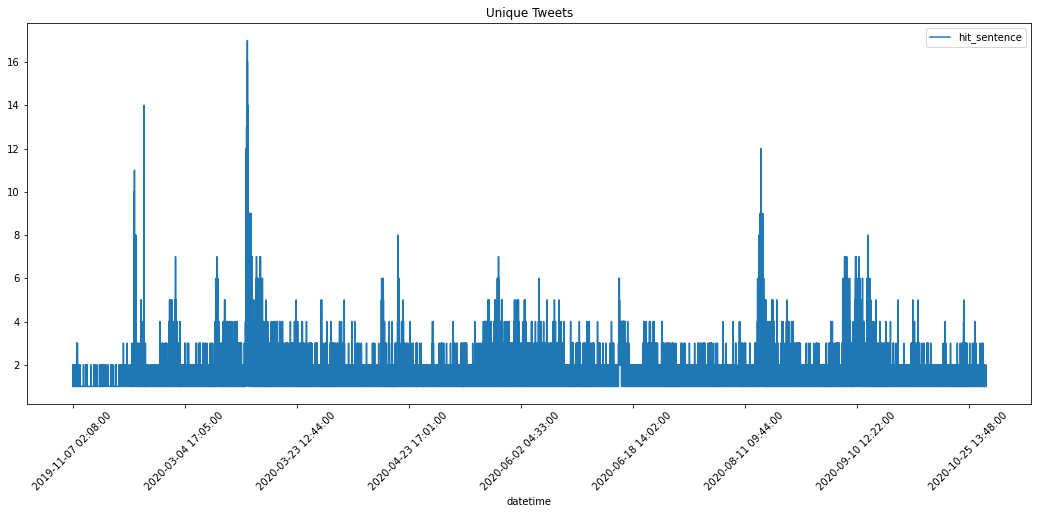

In [82]:
"""By Tweet"""
props = {"rotation": 45}

tweets_timeline = pd.DataFrame(tweetsDF.groupby(['datetime']).nunique()['hit_sentence']).reset_index()
ax = tweets_timeline.plot.line(x='datetime', figsize=(18, 7))
ax.set_title('Unique Tweets')
plt.setp(ax.get_xticklabels(), **props)
plt.show()

C:\Users\alexg\AppData\Roaming\Python\Python36\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning:

FixedFormatter should only be used together with FixedLocator



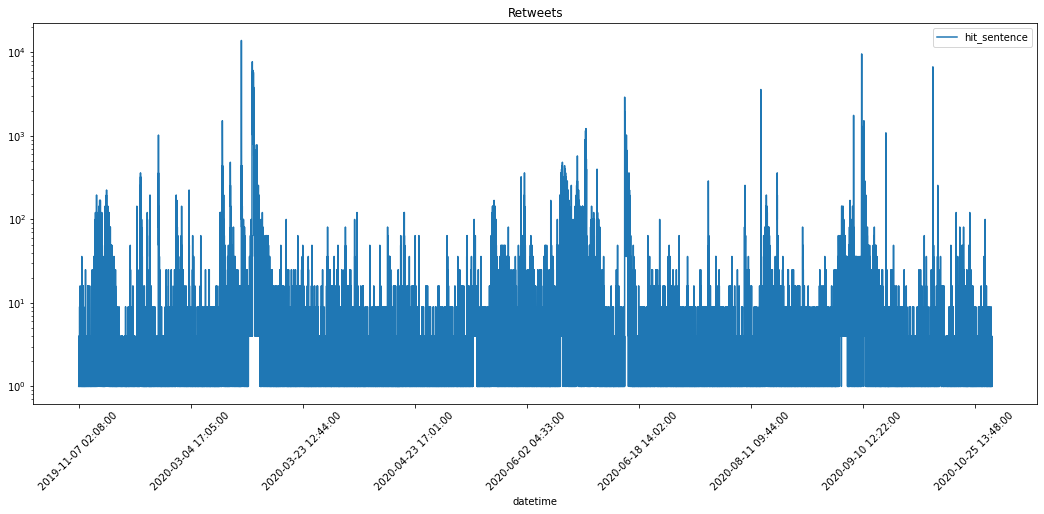

In [83]:
"""By Tweet"""
props = {"rotation": 45}

retweets_timeline = pd.DataFrame(tweetsDF.groupby(['datetime']).count()['hit_sentence']).reset_index()
ax = retweets_timeline.plot.line(x='datetime', figsize=(18, 7))
ax.set_title('Retweets')
ax.set_yscale('log')
plt.setp(ax.get_xticklabels(), **props)
plt.show()